<a href="https://colab.research.google.com/github/88Creative88/WakeWordPicoW/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A.1. Install dependencies

### Python Libraries

Let's start by installing the Python library dependencies:

In [ ]:
!pip install librosa matplotlib pandas "tensorflow==2.8.*" "tensorflow-io==0.24.*" "tensorflow-model-optimization==0.7.2"

!pip install git+https://github.com/ARM-software/CMSIS_5.git@5.8.0#egg=CMSISDSP\&subdirectory=CMSIS/DSP/PythonWrapper

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 409, in resolve
    unsatisfied_names = [
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resol

### Command line tools

Now let's install the command line tools we will need to build applications for the Raspberry Pi RP2040:

In [ ]:
import tensorflow as tf

tf.keras.utils.get_file('cmake-3.21.0-linux-x86_64.tar.gz',
                        'https://github.com/Kitware/CMake/releases/download/v3.21.0/cmake-3.21.0-linux-x86_64.tar.gz',
                        cache_dir='./',
                        cache_subdir='tools',
                        extract=True)

tf.keras.utils.get_file('gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2',
                        'https://developer.arm.com/-/media/Files/downloads/gnu-rm/10-2020q4/gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2',
                        cache_dir='./',
                        cache_subdir='tools',
                        extract=True)

156893184/156882554 [==============================] - 8s 0us/step


'./tools/gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2'

In [ ]:
!apt-get install -y xxd

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xxd is already the newest version (2:8.2.3995-1ubuntu2.16).
xxd set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Now add the downloaded and extracted tools to the `PATH` environmental variable, so we can use them later on without specifying the full path to them:

In [ ]:
import os

os.environ['PATH'] = f"{os.getcwd()}/tools/cmake-3.21.0-linux-x86_64/bin:{os.environ['PATH']}"
os.environ['PATH'] = f"{os.getcwd()}/tools/gcc-arm-none-eabi-10-2020-q4-major/bin:{os.environ['PATH']}"

### Raspberry Pi Pico SDK

We can use `git` to get the `v1.2.0` of the [Raspberry Pi Pico SDK](https://github.com/raspberrypi/pico-sdk)

In [ ]:
%%shell
git clone --branch 1.2.0 https://github.com/raspberrypi/pico-sdk.git
cd pico-sdk
git submodule init
git submodule update

Cloning into 'pico-sdk'...
remote: Enumerating objects: 8074, done.
remote: Counting objects: 100% (2303/2303), done.
remote: Compressing objects: 100% (631/631), done.
remote: Total 8074 (delta 1688), reused 1848 (delta 1539), pack-reused 5771
Receiving objects: 100% (8074/8074), 3.10 MiB | 26.66 MiB/s, done.
Resolving deltas: 100% (4262/4262), done.
Note: switching to 'bfcbefafc5d2a210551a4d9d80b4303d4ae0adf7'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Submodule 'tinyusb' (https://github.com/hathach/tinyusb.git) regis

Set the `PICO_SDK_PATH` environment variable to specify the location of the `pico-sdk`

In [ ]:
os.environ['PICO_SDK_PATH'] = f"{os.getcwd()}/pico-sdk"

**You will need to change the code cell below** to select the board you will be using for the remainder of the tutorial.

By default the `PICO_BOARD` environment variable is set to `sparkfun_micromod` for the SparkFun RP2040 MicroMod. Set the value to `pico` if you are using a Raspberry Pi Pico board.

In [ ]:
# for SparkFun MicroMod
# os.environ['PICO_BOARD'] = 'sparkfun_micromod'

# for Raspberry Pi Pico (uncomment next line)
os.environ['PICO_BOARD'] = 'pico'

print(f"PICO_BOARD env. var. set to '{os.environ['PICO_BOARD']}'")

PICO_BOARD env. var. set to 'pico'


### Project Files

The source code for the inference application and Python utilities for Google Colab can also be cloned using `git`:

In [ ]:
import shutil

# Define the path of the directory you want to delete
directory_path = 'ml-audio-classifier-example-for-pico'

# Use shutil.rmtree to delete the directory and all its contents
try:
    shutil.rmtree(directory_path)
    print(f"The directory {directory_path} has been removed successfully.")
except Exception as e:
    print(f"Error: {e}")


Error: [Errno 2] No such file or directory: 'ml-audio-classifier-example-for-pico'


In [ ]:
%%shell
git clone --recurse-submodules https://github.com/88Creative88/ml-audio-classifier-example-for-pico.git

Cloning into 'ml-audio-classifier-example-for-pico'...
remote: Enumerating objects: 2114, done.
remote: Counting objects: 100% (2114/2114), done.
remote: Compressing objects: 100% (2021/2021), done.
remote: Total 2114 (delta 97), reused 2082 (delta 88), pack-reused 0
Receiving objects: 100% (2114/2114), 77.73 MiB | 46.41 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Submodule 'inference-app/lib/CMSIS_5' (https://github.com/ARM-software/CMSIS_5.git) registered for path 'inference-app/lib/CMSIS_5'
Submodule 'inference-app/lib/microphone-library-for-pico' (https://github.com/ArmDeveloperEcosystem/microphone-library-for-pico.git) registered for path 'inference-app/lib/microphone-library-for-pico'
Submodule 'inference-app/lib/pico-tflmicro' (https://github.com/raspberrypi/pico-tflmicro.git) registered for path 'inference-app/lib/pico-tflmicro'
Cloning into '/content/ml-audio-classifier-example-for-pico/inference-app/lib/CMSIS_5'...
remote: Enumerating objects: 44153, done.        
remo

For convenience we can create symbolic links for the project files that we've cloned to the root Google Colab folder:

In [ ]:
%%shell
ln -s ml-audio-classifier-example-for-pico/colab_utils colab_utils
ln -s ml-audio-classifier-example-for-pico/inference-app inference-app

## A.2. Baseline model



In [ ]:
import tensorflow as tf

tf.keras.utils.get_file('esc-50.zip',
                        'https://github.com/karoldvl/ESC-50/archive/master.zip',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

645701632/Unknown - 39s 0us/step

'./datasets/esc-50.zip'

#### Load dataset metadata

Now we will use the [pandas](https://pandas.pydata.org/) library to read the `datasets/ESC-50-master/meta/esc50.csv` file which contains the metadata for the audio files in the ESC-50 dataset:

In [ ]:
import pandas as pd

esc50_csv = './datasets/ESC-50-master/meta/esc50.csv'
base_data_path = './datasets/ESC-50-master/audio/'

df = pd.read_csv(esc50_csv)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


Then add new column with the `fullpath` of the wave files:

In [ ]:
from os import path

base_data_path = './datasets/ESC-50-master/audio/'

df['fullpath'] = df['filename'].map(lambda x: path.join(base_data_path, x))

df.head()

,filename,fold,target,category,esc10,src_file,take,fullpath
0,1-100032-A-0.wav,1,0,dog,True,100032,A,./datasets/ESC-50-master/audio/1-100032-A-0.wav
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,./datasets/ESC-50-master/audio/1-100038-A-14.wav
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,./datasets/ESC-50-master/audio/1-100210-A-36.wav
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,./datasets/ESC-50-master/audio/1-100210-B-36.wav
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,./datasets/ESC-50-master/audio/1-101296-A-19.wav


#### Load wave file data

We can then define a new function named `load_wav` to load audio samples from a wave file using TensorFlow's [`tf.io.read_file(...)`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) and[`tf.audio.decode_wav(...)`](https://www.tensorflow.org/api_docs/python/tf/audio/decode_wav) API's. The [`tfio.audio.resample(...)`](https://www.tensorflow.org/io/api_docs/python/tfio/audio/resample) API will be used to resample the audio samples at the specified sampling rate.

[librosa](https://librosa.org/)'s [`load(...)`](https://librosa.org/doc/main/generated/librosa.load.html) API will be used as a fallback if TensorFlow is unable to decode the wave file.


In [ ]:
import tensorflow_io as tfio
import librosa

def load_wav(filename, desired_sample_rate, desired_channels):
  try:
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=desired_channels)
    wav = tf.squeeze(wav, axis=-1)
  except:
    # fallback to librosa if the wav file can be read with TF
    filename = tf.cast(filename, tf.string)
    wav, sample_rate = librosa.load(filename.numpy().decode('utf-8'), sr=None, mono=(desired_channels == 1))

  wav = tfio.audio.resample(wav, rate_in=tf.cast(sample_rate, dtype=tf.int64), rate_out=tf.cast(desired_sample_rate, dtype=tf.int64))

  return wav

Now let's load the first wave file, which is a sound of a dog barking, from the pandas `DataFrame`, and plot it overtime using `matplotlib`. The [`IPython.display.Audio(...)`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#IPython.display.Audio) API can be used to playback the audio samples inside the notebook.




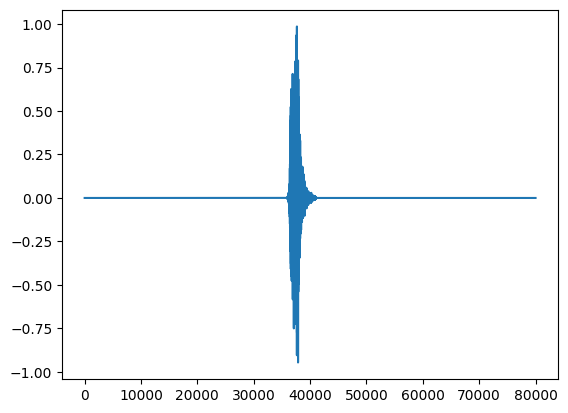

In [ ]:
import matplotlib.pyplot as plt
from IPython import display

sample_rate = 16000
channels = 1

test_wav_file_path = df['fullpath'][0]
test_wav_data = load_wav(test_wav_file_path, sample_rate, channels)

plt.plot(test_wav_data)
plt.show()

display.Audio(test_wav_data, rate=sample_rate)

If we zoom in and only plot samples `32000` to `48000`, we can get a closer plot of the audio samples in the wave file in the 2 to 3 second span:

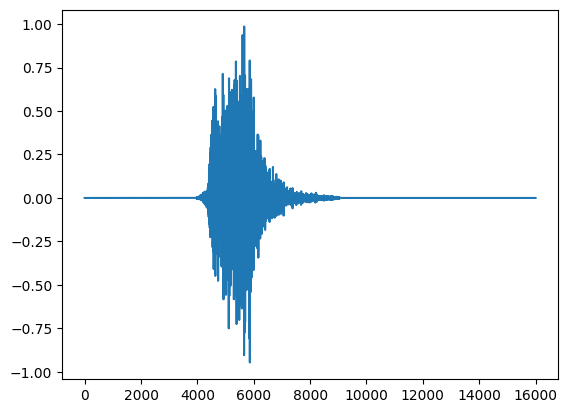

In [ ]:
_ = plt.plot(test_wav_data[32000:48000])

We can then use the [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) TensorFlow API to create a pipeline that loads all wave file data from the dataset.

In [ ]:
fullpaths = df['fullpath']
targets = df['target']
folds = df['fold']

fullpaths_ds = tf.data.Dataset.from_tensor_slices((fullpaths, targets, folds))
fullpaths_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Map each `fullpath` value to wave file samples:

In [ ]:
def load_wav_for_map(fullpath, label, fold):
  wav = tf.py_function(load_wav, [fullpath, sample_rate, channels], tf.float32)

  return wav, label, fold

wav_ds = fullpaths_ds.map(load_wav_for_map)
wav_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

#### Split Wave file data

We would like to train the model on 1 secound soundbites, so we must split up the 5 seconds of audio per item in the ESC-50 dataset to slices of 16000 samples. We will also stride the original audio samples `4000` samples at a time, and filter out any sound chunks that contain pure silence.

In [ ]:
@tf.function
def split_wav(wav, width, stride):
  return tf.map_fn(fn=lambda t: wav[t * stride:t * stride + width], elems=tf.range((tf.shape(wav)[0] - width) // stride), fn_output_signature=tf.float32)

@tf.function
def wav_not_empty(wav):
  return tf.experimental.numpy.any(wav)

def split_wav_for_flat_map(wav, label, fold):
  wavs = split_wav(wav, width=16000, stride=4000)
  labels = tf.repeat(label, tf.shape(wavs)[0])
  folds = tf.repeat(fold, tf.shape(wavs)[0])

  return tf.data.Dataset.from_tensor_slices((wavs, labels, folds))

split_wav_ds = wav_ds.flat_map(split_wav_for_flat_map)
split_wav_ds = split_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

Let's plot the first 5 soundbites over time using `matplotlib`:

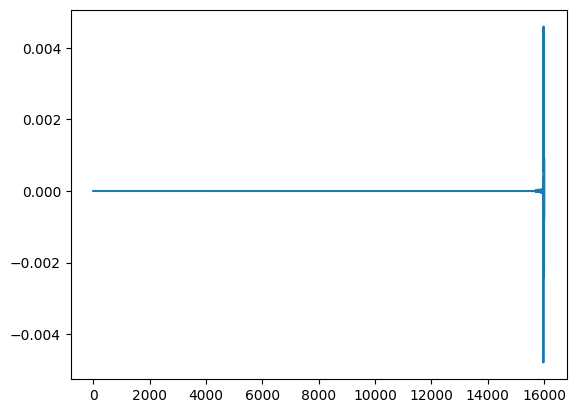

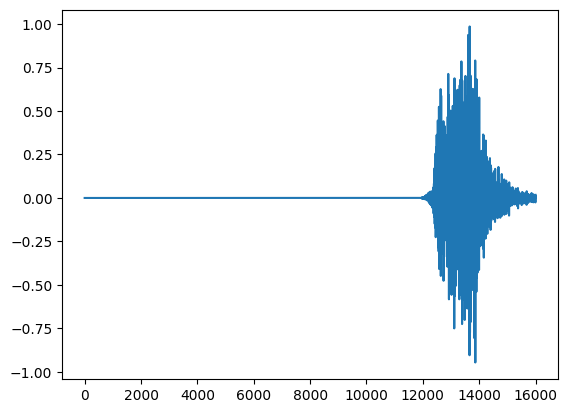

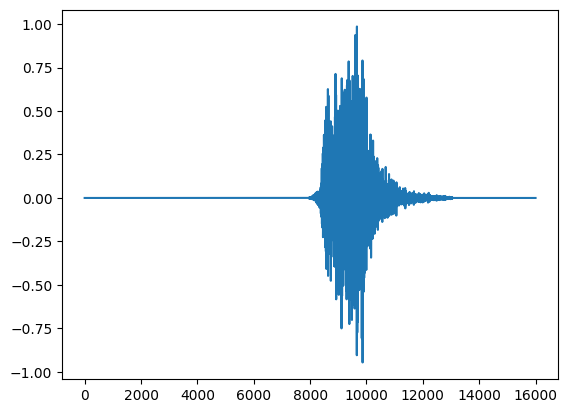

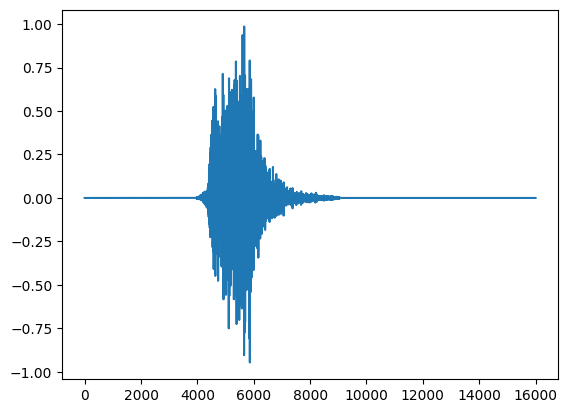

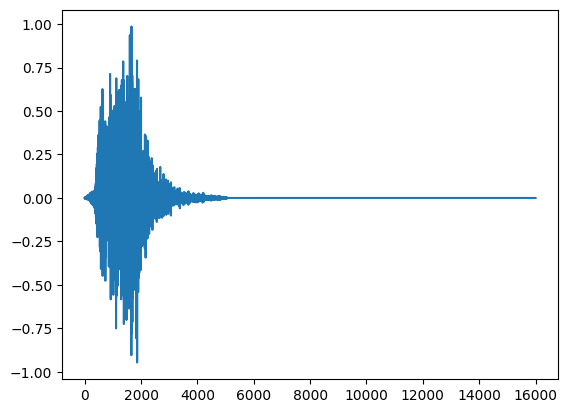

In [ ]:
for wav, _, _ in split_wav_ds.take(5):
  _ = plt.plot(wav)
  plt.show()

#### Create Spectrograms

Rather than passing in the time series data directly into our TensorFlow model, we will transform the audio data into an audio spectrogram representation. This will create a 2D representation of the audio signal’s frequency content over time.

The input audio signal we will use will have a sampling rate of 16kHz, this means one second of audio will contain 16,000 samples. Using TensorFlow’s [`tf.signal.stft(...)`](https://www.tensorflow.org/api_docs/python/tf/signal/stft) function we can transform a 1 second audio signal into a 2D tensor representation. We will choose a frame length of 256 and a frame step of 128, so the output of this feature extraction stage will be a Tensor that has a shape of `(124, 129)`.


In [ ]:
@tf.function
def create_spectrogram(samples):
  return tf.abs(
      tf.signal.stft(samples, frame_length=256, frame_step=128)
  )

Let's take the same 2 - 3 second interval of the first dog barking wave file and create it's spectrogram representation:

In [ ]:
spectrogram = create_spectrogram(test_wav_data[32000:48000])

spectrogram.shape

TensorShape([124, 129])

We can then create `plot_spectrogram` function to plot the spectrogram representation using `matplotlib`:

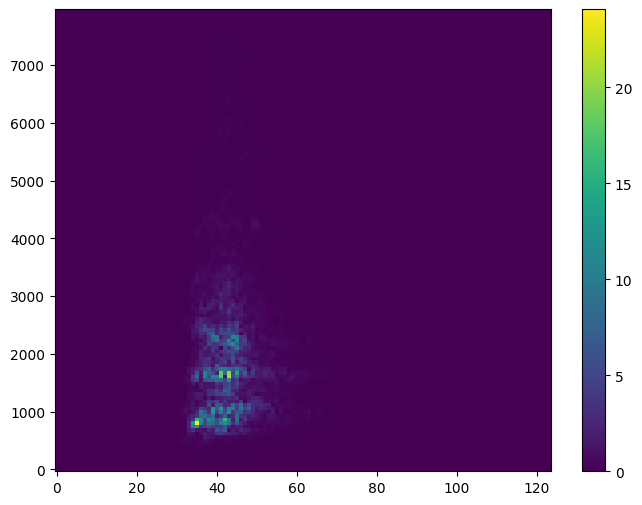

In [ ]:
import numpy as np

def plot_spectrogram(spectrogram, vmax=None):
  transposed_spectrogram = tf.transpose(spectrogram)

  fig = plt.figure(figsize=(8,6))
  height = transposed_spectrogram.shape[0]
  X = np.arange(transposed_spectrogram.shape[1])
  Y = np.arange(height * int(sample_rate / 256), step=int(sample_rate / 256))

  im = plt.pcolormesh(X, Y, tf.transpose(spectrogram), vmax=vmax)

  fig.colorbar(im)
  plt.show()


plot_spectrogram(spectrogram)

Then we can map each split wave item to a spectrogram:

In [ ]:
def create_spectrogram_for_map(samples, label, fold):
  return create_spectrogram(samples), label, fold

spectrograms_ds = split_wav_ds.map(create_spectrogram_for_map)
spectrograms_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Let's plot the first 5 spectrograms in the dataset:

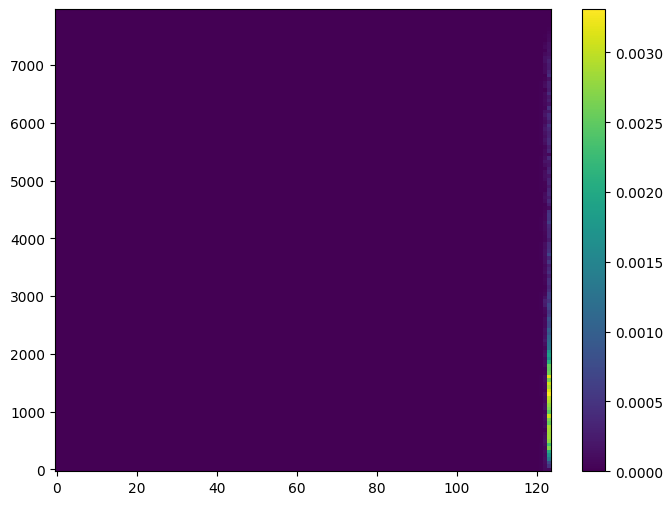

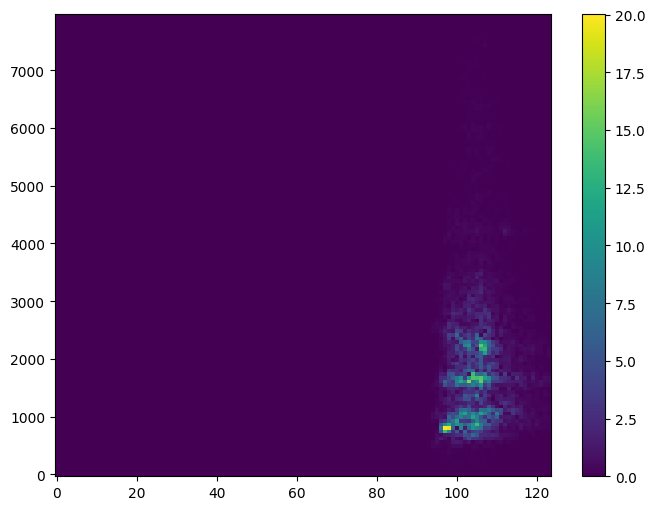

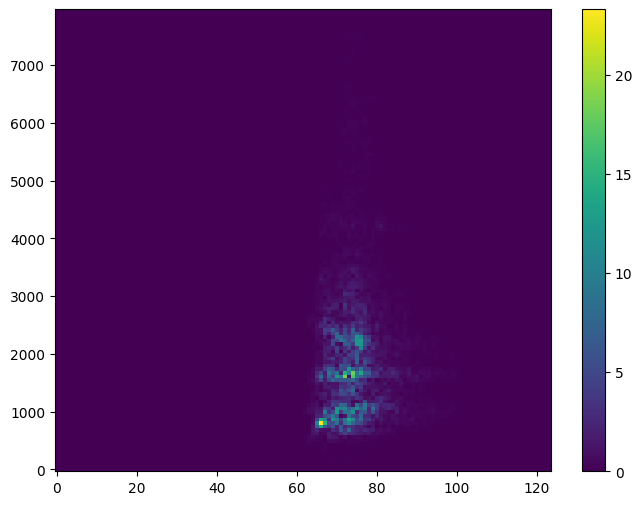

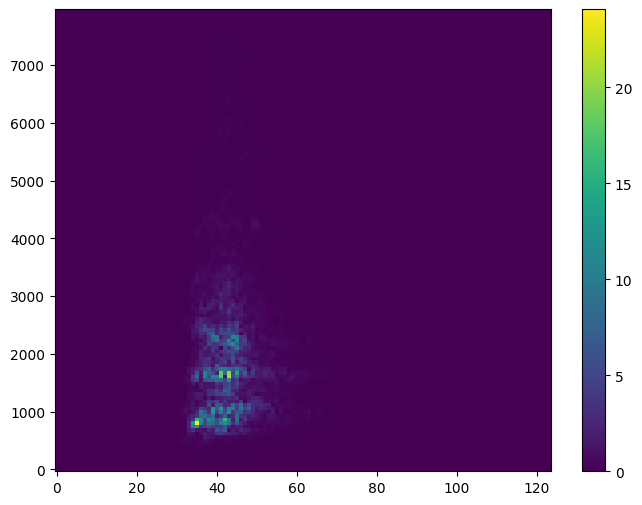

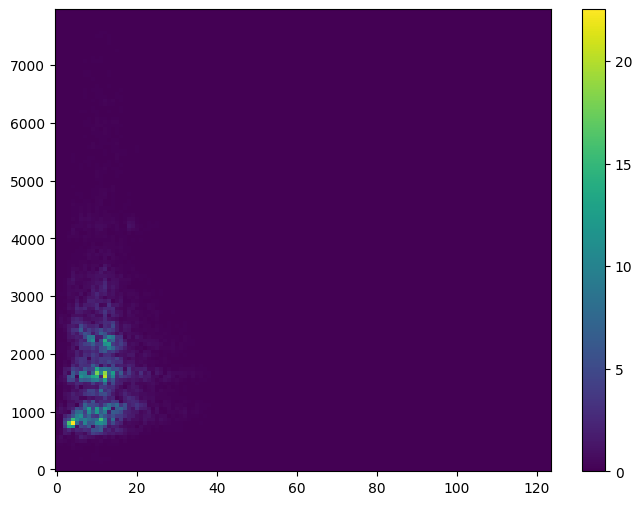

In [ ]:
for s, _, _ in spectrograms_ds.take(5):
  plot_spectrogram(s)

### Split Dataset

Before we start training the ML classifier model, we must split the dataset up in three parts: training, validation, and test.

We will use the same technique in TensorFlow's [Transfer learning with YAMNet for environmental sound classification](https://www.tensorflow.org/tutorials/audio/transfer_learning_audio#split_the_data) guide, and use the `fold` column of the ESC-50 dataset to determine the split.

Before splitting the dataset, let's set a random seed for reproducibility:

In [ ]:
import numpy as np
import tensorflow as tf

# Set seed for experiment reproducibility
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

Entries with a `fold` value of less than 4 will used for training, the ones with a `value` will be used for validation, and finally the remaining items with be used for testing.

The `fold` column will be removed as it is no longer needed, and the dimensions of the spectrogram shape will be expanded from `(124, 129)` to `(124, 129, 1)`. The training items will also be shuffled.

In [ ]:
cached_ds = spectrograms_ds.cache()

train_ds = cached_ds.filter(lambda spectrogram, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda spectrogram, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda spectrogram, label, fold: fold > 4)

# remove the folds column as it's no longer needed
remove_fold_column = lambda spectrogram, label, fold: (tf.expand_dims(spectrogram, axis=-1), label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000, seed=random_seed).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

### Train Model

Now that we have the features extracted from the audio signal, we can create a model using TensorFlow’s Keras  API. The model will consist of 8 layers:

 1. An input layer.
 1. A preprocessing layer, that will resize the input tensor from 124x129x1 to 32x32x1.
 1. A normalization layer, that will scale the input values between -1 and 1
 1. A 2D convolution layer with: 8 filters, a kernel size of 8x8, and stride of 2x2, and ReLU activation function.
 1. A 2D max pooling layer with size of 2x2
 1. A flatten layer to flatten the 2D data to 1D
 1. A dropout layer, that will help reduce overfitting during training
 1. A dense layer with 50 outputs and a softmax activation function, which outputs the likelihood of the sound category (between 0 and 1).


Before we build the model using [Tensflow's Keras API's](https://www.tensorflow.org/api_docs/python/tf/keras), we will create normalization layer and feed in all the spectrogram dataset items.

In [ ]:
for spectrogram, _, _ in cached_ds.take(1):
    input_shape = tf.expand_dims(spectrogram, axis=-1).shape
    print('Input shape:', input_shape)

norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
norm_layer.adapt(cached_ds.map(lambda x, y, z: tf.reshape(x, input_shape)))

Input shape: (124, 129, 1)


Define a sequential 8 layer model as described above:

In [ ]:
baseline_model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=input_shape),
  tf.keras.layers.experimental.preprocessing.Resizing(32, 32, interpolation="nearest"),
  norm_layer,
  tf.keras.layers.Conv2D(8, kernel_size=(8,8), strides=(2, 2), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(50, activation='softmax')
])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 8)         520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dropout (Dropout)           (None, 288)               0

Compile the model with `accuracy` metrics, an Adam optimizer and a sparse categorical crossentropy loss function. As well as define early stopping and dynamic learning rate scheduler callbacks for training.

In [ ]:
METRICS = [
      "accuracy",
]

baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=METRICS,
)

def scheduler(epoch, lr):
  if epoch < 100:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=25),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

Train the model:

In [ ]:
#EPOCHS = 250
#history = baseline_model.fit(
#    train_ds,
#    validation_data=val_ds,
#    epochs=EPOCHS,
#    callbacks=callbacks,
#)



Evaluate the loss and accuracy of the test dataset:

In [ ]:
#baseline_model.evaluate(test_ds)

The baseline model has a relatively low accuracy ~24%, however in the next steps we will use it as a starting point to fine tune a more accurate model for our use case.

Save the model:

In [ ]:
#baseline_model.save("baseline_model")


Create a zip file of the saved model, for download purposes:

In [ ]:
#!zip -r baseline_model.zip baseline_model

## A.3. Transfer Learning



### Download datasets




In [ ]:
tf.keras.utils.get_file('fire_alarms.tar.gz',
                        'https://github.com/ArmDeveloperEcosystem/ml-audio-classifier-example-for-pico/archive/refs/heads/fire_alarms.tar.gz',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

44179456/Unknown - 3s 0us/step

'./datasets/fire_alarms.tar.gz'

In [ ]:

# Definiere das Zielverzeichnis
destination_dir = "/content/datasets/data"

 #Erstelle das Zielverzeichnis, wenn es noch nicht existiert
os.makedirs(destination_dir, exist_ok=True)
tf.keras.utils.get_file('speech_commands_v0.02.tar.gz',
                        'http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz',
                         cache_dir='./',
                         cache_subdir='datasets/data',
                         extract=True)





2428936192/2428923189 [==============================] - 7s 0us/step


'./datasets/data/speech_commands_v0.02.tar.gz'

In [ ]:
import os
import librosa

def delete_mismatched_audio_files(directory, target_length=16000):
    # Walk through the directory structure
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):  # Ensure it's a directory
            for file in os.listdir(subdir_path):
                # Check if the file is a .wav file
                if file.endswith('.wav'):
                    file_path = os.path.join(subdir_path, file)
                    # Load the audio file
                    audio, sr = librosa.load(file_path, sr=None)  # sr=None to preserve original sampling rate
                    # Check the length of the audio
                    if len(audio) < target_length:
                        os.remove(file_path)  # Delete the file if it doesn't match the target length
                        print(f"Deleted {file_path}: Length {len(audio)} < {target_length}")


directory = './datasets/data'
delete_mismatched_audio_files(directory)


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Deleted ./datasets/data/wow/ae04cdbe_nohash_0.wav: Length 11606 < 16000
Deleted ./datasets/data/wow/7cb5c0b7_nohash_0.wav: Length 15604 < 16000
Deleted ./datasets/data/wow/55feffd5_nohash_0.wav: Length 13375 < 16000
Deleted ./datasets/data/wow/e7334395_nohash_1.wav: Length 15604 < 16000
Deleted ./datasets/data/wow/a4baac4e_nohash_0.wav: Length 12971 < 16000
Deleted ./datasets/data/wow/d2eae23d_nohash_0.wav: Length 11606 < 16000
Deleted ./datasets/data/wow/dc6e9c04_nohash_0.wav: Length 11606 < 16000
Deleted ./datasets/data/wow/79b37d3a_nohash_1.wav: Length 13375 < 16000
Deleted ./datasets/data/wow/22aa3665_nohash_0.wav: Length 7510 < 16000
Deleted ./datasets/data/wow/b4bef564_nohash_0.wav: Length 14118 < 16000
Deleted ./datasets/data/wow/b176f8e9_nohash_0.wav: Length 12056 < 16000
Deleted ./datasets/data/wow/ae5578f4_nohash_0.wav: Length 11888 < 16000
Deleted ./datasets/data/wow/13dce503_nohash_0.wav: Length 12631 < 1600

In [ ]:
# Since we only need the files in the _background_noise_ folder of the dataset
# use the curl command to download the archive file and then manually extract
# using the tar command, instead of using tf.keras.utils.get_file(...)
# in Python

!mkdir -p datasets/speech_commands
!curl -L -o datasets/speech_commands_v0.02.tar.gz http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!tar --wildcards --directory datasets/speech_commands -xzvf datasets/speech_commands_v0.02.tar.gz './_background_noise_/*'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2316M  100 2316M    0     0   289M      0  0:00:07  0:00:07 --:--:--  305M
./_background_noise_/README.md
./_background_noise_/pink_noise.wav
./_background_noise_/running_tap.wav
./_background_noise_/exercise_bike.wav
./_background_noise_/doing_the_dishes.wav
./_background_noise_/dude_miaowing.wav
./_background_noise_/white_noise.wav


In [ ]:
!mv /content/ml-audio-classifier-example-for-pico/custom /content/datasets

### Load dataset



In [ ]:
import shutil
import random
import os

# Basispfad zu den Daten
base_path = './datasets/data'

# Zielverzeichnis für die unbekannten Dateien
unknown_dir = os.path.join(base_path, 'unknown')

# Erstelle das Verzeichnis, falls es nicht existiert
if not os.path.exists(unknown_dir):
    os.makedirs(unknown_dir)

# Gesamtliste der Unterverzeichnisse
all_subdirs = ["go", "up", "left", "right", "one", "two", "three", "four", "backward", "bed", "bird", "cat", "dog", "down", "eight", "five", "follow", "forward", "happy", "house", "learn", "marvin", "nine", "no", "off", "on", "seven", "sheila", "six", "stop", "three", "visual", "wow", "yes", "zero"]
# Liste der Unterverzeichnisse, die ignoriert werden sollen
ignore_subdirs = ["go", "up"]

# Liste der zu beachtenden Unterverzeichnisse
subdirs = [subdir for subdir in all_subdirs if subdir not in ignore_subdirs]

# Durchlaufe jedes Unterverzeichnis
for subdir in subdirs:
    current_dir = os.path.join(base_path, subdir)

    # Stelle sicher, dass das Verzeichnis existiert
    if os.path.exists(current_dir):
        # Hole alle Dateien im aktuellen Unterverzeichnis
        files = os.listdir(current_dir)

        # Bestimme 20% dieser Dateien
        num_files_to_select = int(0.05 * len(files))
        selected_files = random.sample(files, num_files_to_select)

        # Kopiere die ausgewählten Dateien ins unknown-Verzeichnis
        for file in selected_files:
            source_path = os.path.join(current_dir, file)
            destination_path = os.path.join(unknown_dir, file)
            shutil.copy2(source_path, destination_path)

print("Dateien wurden erfolgreich kopiert.")


Dateien wurden erfolgreich kopiert.


In [ ]:
go_ds = tf.data.Dataset.list_files("datasets/data/go/*.wav", shuffle=False)
go_ds = go_ds.map(lambda x: (x, 1, -1))

In [ ]:
up_ds = tf.data.Dataset.list_files("datasets/data/up/*.wav", shuffle=False)
up_ds = up_ds.map(lambda x: (x, 0, -1))  # Assuming '2' is the label for the "up" class


In [ ]:
bg_ds = tf.data.Dataset.list_files("datasets/custom/background_noise/*.wav", shuffle=False)
bg_ds = bg_ds.map(lambda x: (x, 2, -1))  # Assuming '3' is the label for the "bg" class

In [ ]:
un_ds = tf.data.Dataset.list_files("datasets/data/unknown/*.wav", shuffle=False)
un_ds = un_ds.map(lambda x: (x, 3, -1))  # Assuming '3' is the label for the "bg" class

In [ ]:
background_noise_files_ds = tf.data.Dataset.list_files("datasets/speech_commands/_background_noise_/*.wav", shuffle=False)
background_noise_files_ds = background_noise_files_ds.map(lambda x: (x, 4, -1))

In [ ]:
go_wav_ds = go_ds.map(load_wav_for_map)
go_wav_ds = go_wav_ds.cache()

up_wav_ds = up_ds.map(load_wav_for_map)
up_wav_ds = up_wav_ds.cache()

bg_wav_ds = bg_ds.map(load_wav_for_map)
bg_wav_ds = bg_wav_ds.cache()


un_wav_ds = un_ds.map(load_wav_for_map)
un_wav_ds = un_wav_ds.cache()

background_noise_wav_ds = background_noise_files_ds.map(load_wav_for_map)
background_noise_wav_ds = background_noise_wav_ds.cache()

Then split the audio samples into 1 second soundbites:

In [ ]:

split_go_wav_ds = go_wav_ds.filter(lambda x, y, z: wav_not_empty(x))
split_up_wav_ds = up_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

split_un_wav_ds = un_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

split_bg_wav_ds = bg_wav_ds.flat_map(split_wav_for_flat_map)
split_bg_wav_ds = split_bg_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

split_background_noise_wav_ds = background_noise_wav_ds.flat_map(split_wav_for_flat_map)
split_background_noise_wav_ds = split_background_noise_wav_ds.filter(lambda x, y, z: wav_not_empty(x))


In [ ]:
import cmsisdsp
from numpy import pi as PI

window_size = 256
step_size = 128

hanning_window_f32 = np.zeros(window_size)
for i in range(window_size):
  hanning_window_f32[i] = 0.5 * (1 - cmsisdsp.arm_cos_f32(2 * PI * i / window_size ))

hanning_window_q15 = cmsisdsp.arm_float_to_q15(hanning_window_f32)

rfftq15 = cmsisdsp.arm_rfft_instance_q15()
status = cmsisdsp.arm_rfft_init_q15(rfftq15, window_size, 0, 1)

def get_arm_spectrogram(waveform):

  num_frames = int(1 + (len(waveform) - window_size) // step_size)
  fft_size = int(window_size // 2 + 1)

  # Convert the audio to q15
  waveform_q15 = cmsisdsp.arm_float_to_q15(waveform)

  # Create empty spectrogram array
  spectrogram_q15 = np.empty((num_frames, fft_size), dtype = np.int16)

  start_index = 0

  for index in range(num_frames):
    # Take the window from the waveform.
    window = waveform_q15[start_index:start_index + window_size]

    # Apply the Hanning Window.
    window = cmsisdsp.arm_mult_q15(window, hanning_window_q15)

    # Calculate the FFT, shift by 7 according to docs
    window = cmsisdsp.arm_rfft_q15(rfftq15, window)

    # Take the absolute value of the FFT and add to the Spectrogram.
    spectrogram_q15[index] = cmsisdsp.arm_cmplx_mag_q15(window)[:fft_size]

    # Increase the start index of the window by the overlap amount.
    start_index = start_index + step_size


  # Convert to numpy output ready for keras
  return cmsisdsp.arm_q15_to_float(spectrogram_q15).reshape(num_frames,fft_size) * 512

In [ ]:
@tf.function
def create_arm_spectrogram_for_map(wav, label, fold):
  spectrogram = tf.py_function(get_arm_spectrogram, [wav], tf.float32)
  return spectrogram, label, fold

In [ ]:


print("go")
go_spectrograms_ds = split_go_wav_ds.map(create_arm_spectrogram_for_map)
go_spectrograms_ds = go_spectrograms_ds.cache()

print("up")
up_spectrograms_ds = split_up_wav_ds.map(create_arm_spectrogram_for_map)
up_spectrograms_ds = up_spectrograms_ds.cache()


print("un")
un_spectrograms_ds = split_un_wav_ds.map(create_arm_spectrogram_for_map)
un_spectrograms_ds = un_spectrograms_ds.cache()

print("bg")
bg_spectrograms_ds = split_bg_wav_ds.map(create_arm_spectrogram_for_map)
bg_spectrograms_ds = bg_spectrograms_ds.cache()

background_noise_spectrograms_ds = split_background_noise_wav_ds.map(create_arm_spectrogram_for_map)
background_noise_spectrograms_ds = background_noise_spectrograms_ds.cache()

go
up
un
bg


In [ ]:
background_noise_spectrograms_ds = background_noise_spectrograms_ds.repeat(3)
bg_spectrograms_ds = bg_spectrograms_ds.repeat(5)

In [ ]:
def calculate_ds_len(ds):
    count = 0
    try:
        for _, _, _ in ds:
            count += 1
    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")
        return 0
    return count


num_go_spectrograms = calculate_ds_len(go_spectrograms_ds)
print(f"num_go_spectrograms = {num_go_spectrograms}")
num_up_spectrograms = calculate_ds_len(up_spectrograms_ds)
print(f"num_up_spectrograms = {num_up_spectrograms}")
num_bg_spectrograms = calculate_ds_len(bg_spectrograms_ds)
print(f"num_bg_spectrograms = {num_bg_spectrograms}")
num_un_spectrograms = calculate_ds_len(un_spectrograms_ds)
print(f"num_un_spectrograms = {num_un_spectrograms}")

num_background_noise_spectrograms = calculate_ds_len(background_noise_spectrograms_ds)
print(f"num_background_noise_spectrograms = {num_background_noise_spectrograms}")

num_go_spectrograms = 3478
num_up_spectrograms = 3269
num_bg_spectrograms = 3505
num_un_spectrograms = 3089
num_background_noise_spectrograms = 4716


### Data Augmentation

#### White Noise

In [ ]:
def add_white_noise(audio):
  #generate noise and the scalar multiplier
  noise = tf.random.uniform(shape=tf.shape(audio), minval=-1, maxval=1)
  noise_scalar = tf.random.uniform(shape=[1], minval=0, maxval=0.2)

  # add them to the original audio
  audio_with_noise = audio + (noise * noise_scalar)

  # final clip the values to ensure they are still between -1 and 1
  audio_with_noise = tf.clip_by_value(audio_with_noise, clip_value_min=-1, clip_value_max=1)

  return audio_with_noise

#### Random Silence



In [ ]:
def add_random_silence(audio):
  audio_mask = tf.random.categorical(tf.math.log([[0.2, 0.8]]), num_samples=tf.shape(audio)[0])
  audio_mask = tf.cast(audio_mask, dtype=tf.float32)
  audio_mask = tf.squeeze(audio_mask, axis=0)

  # multiply the audio input by the mask
  augmented_audio = audio * audio_mask

  return augmented_audio

#### Audio Mixups



In [ ]:
def add_audio_mixup(audio, mixup_audio):


  # randomly generate a scalar
  noise_scalar = tf.random.uniform(shape=[1], minval=0, maxval=1)

  # add the background noise to the audio
  augmented_audio = audio + (mixup_audio * noise_scalar)

  #final clip the values so they are stil between -1 and 1
  augmented_audio = tf.clip_by_value(augmented_audio, clip_value_min=-1, clip_value_max=1)

  return augmented_audio

### Create Augmented Dataset



In [ ]:
num_augmented_go_spectrograms = num_background_noise_spectrograms - num_go_spectrograms
num_augmented_up_spectrograms = num_background_noise_spectrograms - num_up_spectrograms
num_augmented_bg_spectrograms = num_background_noise_spectrograms - num_bg_spectrograms
num_augmented_un_spectrograms = num_background_noise_spectrograms - num_un_spectrograms


In [ ]:
num_white_noise_go_spectrograms = num_augmented_go_spectrograms // 3
num_random_silence_go_spectrograms = num_augmented_go_spectrograms // 3
num_audio_mixup_go_spectrograms = num_augmented_go_spectrograms // 3
num_white_noise_up_spectrograms = num_augmented_up_spectrograms // 3
num_random_silence_up_spectrograms = num_augmented_up_spectrograms // 3
num_audio_mixup_up_spectrograms = num_augmented_up_spectrograms // 3

num_white_noise_bg_spectrograms = num_augmented_bg_spectrograms // 3
num_random_silence_bg_spectrograms = num_augmented_bg_spectrograms // 3
num_audio_mixup_bg_spectrograms = num_augmented_bg_spectrograms // 3
num_white_noise_un_spectrograms = num_augmented_un_spectrograms // 3
num_random_silence_un_spectrograms = num_augmented_un_spectrograms // 3
num_audio_mixup_un_spectrograms = num_augmented_un_spectrograms // 3


In [ ]:
split_go_wav_ds = split_go_wav_ds.cache()
preaugmented_split_go_wav = split_go_wav_ds.shuffle(num_augmented_go_spectrograms, seed=random_seed).take(num_augmented_go_spectrograms)
split_up_wav_ds = split_up_wav_ds.cache()
preaugmented_split_up_wav = split_up_wav_ds.shuffle(num_augmented_up_spectrograms, seed=random_seed).take(num_augmented_up_spectrograms)

split_bg_wav_ds = split_bg_wav_ds.cache()
preaugmented_split_bg_wav = split_bg_wav_ds.shuffle(num_augmented_bg_spectrograms, seed=random_seed).take(num_augmented_bg_spectrograms)
split_un_wav_ds = split_un_wav_ds.cache()
preaugmented_split_un_wav = split_un_wav_ds.shuffle(num_augmented_un_spectrograms, seed=random_seed).take(num_augmented_un_spectrograms)


In [ ]:
def add_white_noise_for_map(wav, label, fold):
  return add_white_noise(wav), label, fold

white_noise_go_wav_ds = preaugmented_split_go_wav.take(num_white_noise_go_spectrograms)
white_noise_go_wav_ds = white_noise_go_wav_ds.map(add_white_noise_for_map)
white_noise_up_wav_ds = preaugmented_split_up_wav.take(num_white_noise_up_spectrograms)
white_noise_up_wav_ds = white_noise_up_wav_ds.map(add_white_noise_for_map)

white_noise_bg_wav_ds = preaugmented_split_bg_wav.take(num_white_noise_bg_spectrograms)
white_noise_bg_wav_ds = white_noise_bg_wav_ds.map(add_white_noise_for_map)
white_noise_un_wav_ds = preaugmented_split_un_wav.take(num_white_noise_un_spectrograms)
white_noise_un_wav_ds = white_noise_un_wav_ds.map(add_white_noise_for_map)


In [ ]:
def add_random_silence_for_map(wav, label, fold):
  return add_random_silence(wav), label, fold

random_silence_go_wav_ds = preaugmented_split_go_wav.skip(num_white_noise_go_spectrograms)
random_silence_go_wav_ds = random_silence_go_wav_ds.take(num_random_silence_go_spectrograms)
random_silence_go_wav_ds = random_silence_go_wav_ds.map(add_random_silence_for_map)

random_silence_up_wav_ds = preaugmented_split_up_wav.skip(num_white_noise_up_spectrograms)
random_silence_up_wav_ds = random_silence_up_wav_ds.take(num_random_silence_up_spectrograms)
random_silence_up_wav_ds = random_silence_up_wav_ds.map(add_random_silence_for_map)


random_silence_un_wav_ds = preaugmented_split_un_wav.skip(num_white_noise_un_spectrograms)
random_silence_un_wav_ds = random_silence_un_wav_ds.take(num_random_silence_un_spectrograms)
random_silence_un_wav_ds = random_silence_un_wav_ds.map(add_random_silence_for_map)

random_silence_bg_wav_ds = preaugmented_split_bg_wav.skip(num_white_noise_bg_spectrograms)
random_silence_bg_wav_ds = random_silence_bg_wav_ds.take(num_random_silence_bg_spectrograms)
random_silence_bg_wav_ds = random_silence_bg_wav_ds.map(add_random_silence_for_map)



In [ ]:
def add_audio_mixup_for_map(wav, label, fold):
  return add_audio_mixup(wav, next(audio_mixup_background_noise_iter)), label, fold

In [ ]:
audio_mixup_background_noise_ds = split_background_noise_wav_ds.shuffle(num_audio_mixup_go_spectrograms).take(num_audio_mixup_go_spectrograms)
audio_mixup_background_noise_iter = iter(audio_mixup_background_noise_ds.map(lambda x, y, z: x))

audio_mixup_split_go_wav_ds = preaugmented_split_go_wav.skip(num_white_noise_go_spectrograms + num_random_silence_go_spectrograms)
audio_mixup_split_go_wav_ds = audio_mixup_split_go_wav_ds.take(num_audio_mixup_go_spectrograms)
audio_mixup_split_go_wav_ds = audio_mixup_split_go_wav_ds.map(add_audio_mixup_for_map)


audio_mixup_background_noise_ds = split_background_noise_wav_ds.shuffle(num_audio_mixup_up_spectrograms).take(num_audio_mixup_up_spectrograms)
audio_mixup_background_noise_iter = iter(audio_mixup_background_noise_ds.map(lambda x, y, z: x))

audio_mixup_split_up_wav_ds = preaugmented_split_up_wav.skip(num_white_noise_up_spectrograms + num_random_silence_up_spectrograms)
audio_mixup_split_up_wav_ds = audio_mixup_split_up_wav_ds.take(num_audio_mixup_up_spectrograms)
audio_mixup_split_up_wav_ds = audio_mixup_split_up_wav_ds.map(add_audio_mixup_for_map)


audio_mixup_background_noise_ds = split_background_noise_wav_ds.shuffle(num_audio_mixup_un_spectrograms).take(num_audio_mixup_un_spectrograms)
audio_mixup_background_noise_iter = iter(audio_mixup_background_noise_ds.map(lambda x, y, z: x))

audio_mixup_split_un_wav_ds = preaugmented_split_un_wav.skip(num_white_noise_un_spectrograms + num_random_silence_un_spectrograms)
audio_mixup_split_un_wav_ds = audio_mixup_split_un_wav_ds.take(num_audio_mixup_un_spectrograms)
audio_mixup_split_un_wav_ds = audio_mixup_split_un_wav_ds.map(add_audio_mixup_for_map)


audio_mixup_background_noise_ds = split_background_noise_wav_ds.shuffle(num_audio_mixup_bg_spectrograms).take(num_audio_mixup_bg_spectrograms)
audio_mixup_background_noise_iter = iter(audio_mixup_background_noise_ds.map(lambda x, y, z: x))

audio_mixup_split_bg_wav_ds = preaugmented_split_bg_wav.skip(num_white_noise_bg_spectrograms + num_random_silence_bg_spectrograms)
audio_mixup_split_bg_wav_ds = audio_mixup_split_bg_wav_ds.take(num_audio_mixup_bg_spectrograms)
audio_mixup_split_bg_wav_ds = audio_mixup_split_bg_wav_ds.map(add_audio_mixup_for_map)

In [ ]:
augment_split_go_wav_ds = tf.data.Dataset.concatenate(white_noise_go_wav_ds, random_silence_go_wav_ds)
augment_split_go_wav_ds = tf.data.Dataset.concatenate(augment_split_go_wav_ds, audio_mixup_split_go_wav_ds)

augment_go_spectrograms_ds = augment_split_go_wav_ds.map(create_arm_spectrogram_for_map)


augment_split_up_wav_ds = tf.data.Dataset.concatenate(white_noise_up_wav_ds, random_silence_up_wav_ds)
augment_split_up_wav_ds = tf.data.Dataset.concatenate(augment_split_up_wav_ds, audio_mixup_split_up_wav_ds)

augment_up_spectrograms_ds = augment_split_up_wav_ds.map(create_arm_spectrogram_for_map)


augment_split_un_wav_ds = tf.data.Dataset.concatenate(white_noise_un_wav_ds, random_silence_un_wav_ds)
augment_split_un_wav_ds = tf.data.Dataset.concatenate(augment_split_un_wav_ds, audio_mixup_split_un_wav_ds)

augment_un_spectrograms_ds = augment_split_un_wav_ds.map(create_arm_spectrogram_for_map)


augment_split_bg_wav_ds = tf.data.Dataset.concatenate(white_noise_bg_wav_ds, random_silence_bg_wav_ds)
augment_split_bg_wav_ds = tf.data.Dataset.concatenate(augment_split_bg_wav_ds, audio_mixup_split_bg_wav_ds)

augment_bg_spectrograms_ds = augment_split_bg_wav_ds.map(create_arm_spectrogram_for_map)

### Split Dataset



In [ ]:

full_go_ds = tf.data.Dataset.concatenate(go_spectrograms_ds, augment_go_spectrograms_ds)
full_up_ds = tf.data.Dataset.concatenate(up_spectrograms_ds, augment_up_spectrograms_ds)
full_un_ds = tf.data.Dataset.concatenate(un_spectrograms_ds, augment_un_spectrograms_ds)
full_bg_ds = tf.data.Dataset.concatenate(bg_spectrograms_ds, augment_bg_spectrograms_ds)


full_ds = tf.data.Dataset.concatenate(full_un_ds, full_bg_ds)
full_ds = tf.data.Dataset.concatenate(full_ds, full_up_ds)

full_ds = tf.data.Dataset.concatenate(full_ds, full_go_ds)

# Cache das gesamte DataSet für effizientere Zugriffe.
full_ds = full_ds.cache()

# Berechne die Größe des vollständigen DataSets.
def calculate_ds_len(ds):
    return sum(1 for _ in ds)

full_ds_size = calculate_ds_len(full_ds)
print(f'full_ds_size = {full_ds_size}')

# Mische das gesamte DataSet.
full_ds = full_ds.shuffle(full_ds_size)


full_ds_size = 18350


In [ ]:
train_ds_size = int(0.60 * full_ds_size)
val_ds_size = int(0.20 * full_ds_size)
test_ds_size = int(0.20 * full_ds_size)

train_ds = full_ds.take(train_ds_size)

remaining_ds = full_ds.skip(train_ds_size)
val_ds = remaining_ds.take(val_ds_size)
test_ds = remaining_ds.skip(val_ds_size)

# remove the folds column as it's no longer needed
remove_fold_column = lambda spectrogram, label, fold: (tf.expand_dims(spectrogram, axis=-1), label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

### Replace Baseline Model Classification Head and Train Model



In [ ]:
!unzip -q /content/ml-audio-classifier-example-for-pico/baseline_model.zip -d /content



In [ ]:

num_classes = 4

# We need a new head with neurons equal to the number of classes.
model_body = tf.keras.Model(inputs=baseline_model.input, outputs=baseline_model.layers[-2].output)

classifier_head = tf.keras.layers.Dense(num_classes, activation="softmax")(model_body.output)  # Changed to 'softmax'

fine_tune_model = tf.keras.Model(model_body.input, classifier_head)

fine_tune_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 129, 1)]     0         
                                                                 
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 8)         520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0   

In [ ]:
for layer in fine_tune_model.layers:
  layer.trainable = False

In [ ]:
fine_tune_model.layers[-1].trainable = True

In [ ]:
METRICS = [
      "accuracy",
]

fine_tune_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
    metrics=['accuracy']
)

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=5),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

In [ ]:
EPOCHS = 25

history_1 = fine_tune_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
)

Epoch 1/25
345/345 [==============================] - 2s 4ms/step - loss: 1.2571 - accuracy: 0.4247 - val_loss: 1.1633 - val_accuracy: 0.4981 - lr: 0.0010
Epoch 2/25
345/345 [==============================] - 1s 4ms/step - loss: 1.1409 - accuracy: 0.4932 - val_loss: 1.1097 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 3/25
345/345 [==============================] - 1s 4ms/step - loss: 1.1023 - accuracy: 0.5114 - val_loss: 1.0836 - val_accuracy: 0.5316 - lr: 0.0010
Epoch 4/25
345/345 [==============================] - 1s 4ms/step - loss: 1.0811 - accuracy: 0.5162 - val_loss: 1.0647 - val_accuracy: 0.5322 - lr: 0.0010
Epoch 5/25
345/345 [==============================] - 1s 4ms/step - loss: 1.0630 - accuracy: 0.5314 - val_loss: 1.0553 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 6/25
345/345 [==============================] - 1s 4ms/step - loss: 1.0575 - accuracy: 0.5289 - val_loss: 1.0452 - val_accuracy: 0.5482 - lr: 0.0010
Epoch 7/25
345/345 [==============================] - 1s 4ms/step - lo

Text(0, 0.5, 'Accuracy [%]')

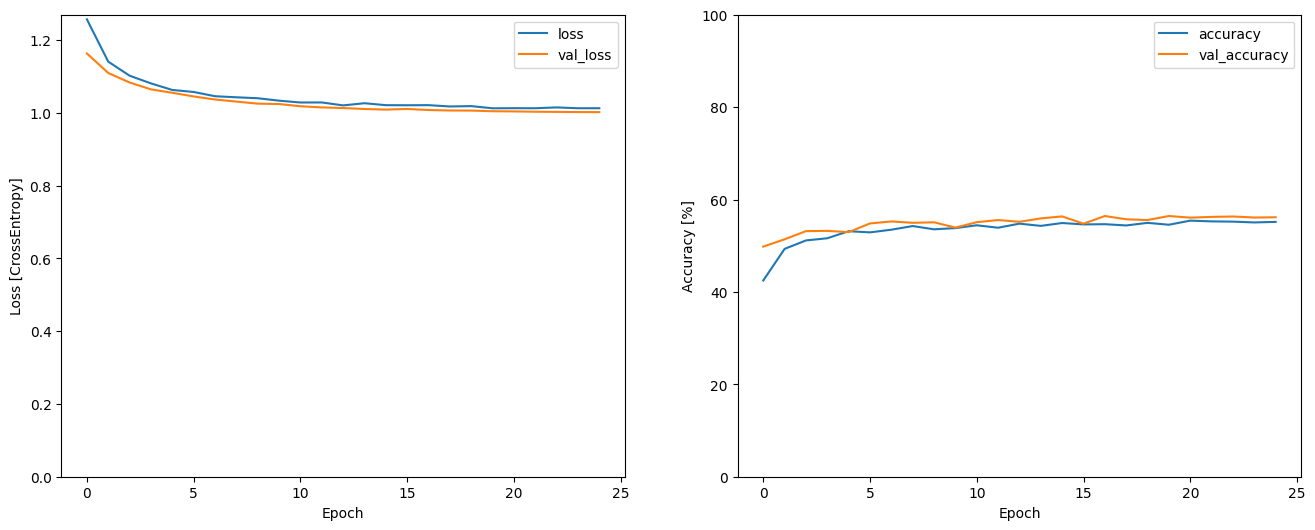

In [ ]:
metrics = history_1.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history_1.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history_1.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [ ]:
for layer in fine_tune_model.layers:
  layer.trainable = True

fine_tune_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
    metrics=['accuracy']
)

def scheduler(epoch, lr):
  return lr * tf.math.exp(-0.1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=5),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

In [ ]:
EPOCHS = 10

history_2 = fine_tune_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
)

Epoch 1/10
345/345 [==============================] - 2s 6ms/step - loss: 0.9701 - accuracy: 0.5868 - val_loss: 0.9368 - val_accuracy: 0.6163 - lr: 9.0484e-04
Epoch 2/10
345/345 [==============================] - 2s 6ms/step - loss: 0.9363 - accuracy: 0.6084 - val_loss: 0.9124 - val_accuracy: 0.6245 - lr: 8.1873e-04
Epoch 3/10
345/345 [==============================] - 2s 6ms/step - loss: 0.9197 - accuracy: 0.6137 - val_loss: 0.8945 - val_accuracy: 0.6264 - lr: 7.4082e-04
Epoch 4/10
345/345 [==============================] - 2s 6ms/step - loss: 0.9045 - accuracy: 0.6264 - val_loss: 0.8822 - val_accuracy: 0.6376 - lr: 6.7032e-04
Epoch 5/10
345/345 [==============================] - 2s 5ms/step - loss: 0.8989 - accuracy: 0.6244 - val_loss: 0.8765 - val_accuracy: 0.6368 - lr: 6.0653e-04
Epoch 6/10
345/345 [==============================] - 2s 5ms/step - loss: 0.8873 - accuracy: 0.6300 - val_loss: 0.8680 - val_accuracy: 0.6409 - lr: 5.4881e-04
Epoch 7/10
345/345 [==========================

Text(0, 0.5, 'Accuracy [%]')

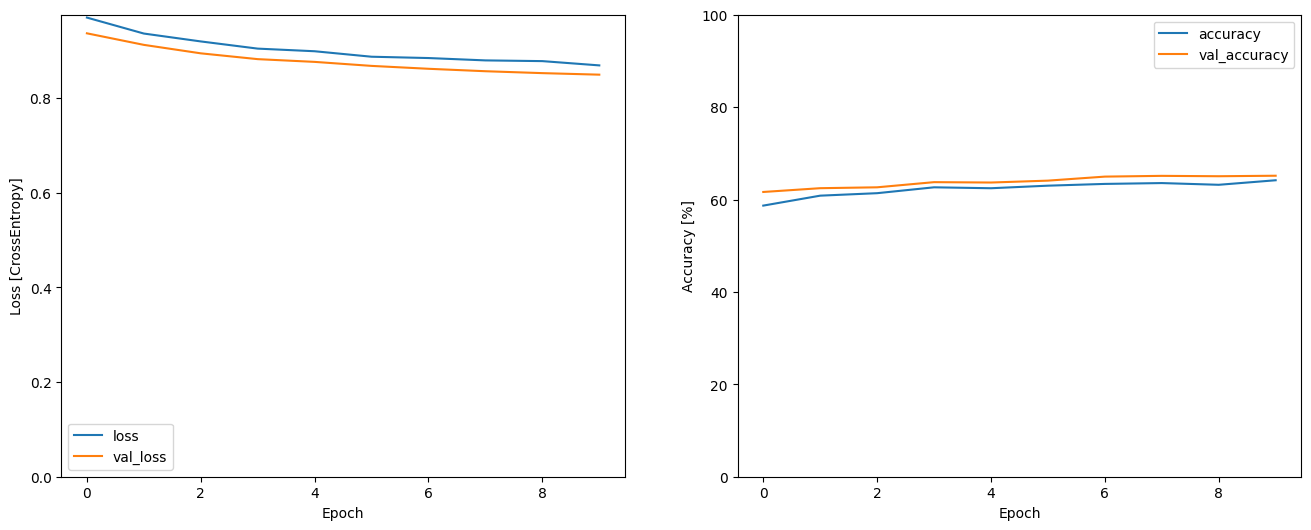

In [ ]:
metrics = history_2.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history_2.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history_2.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')



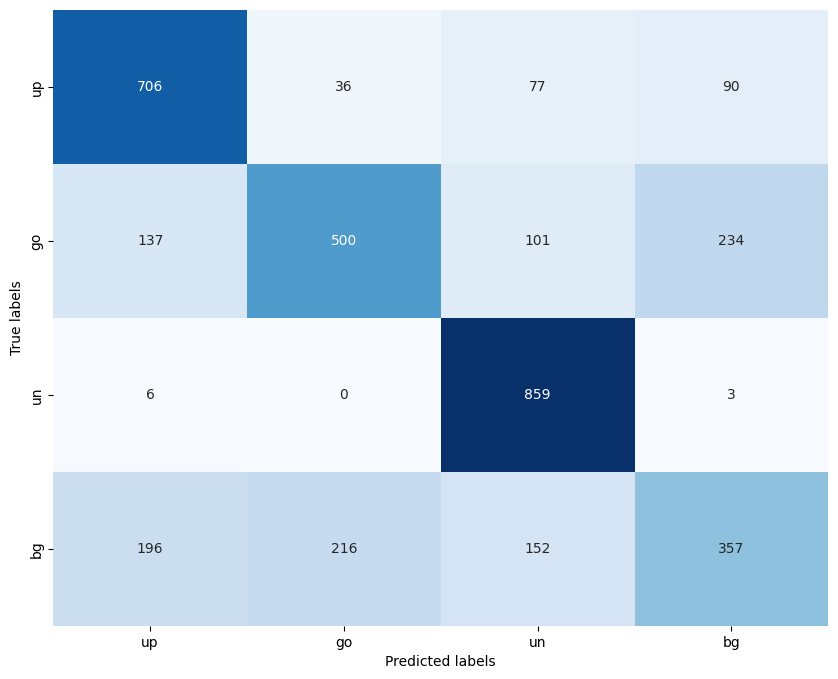

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Vorhersagen auf dem Testdatensatz
predictions = fine_tune_model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Wirkliche Labels extrahieren
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Konfusionsmatrix erstellen
cm = confusion_matrix(true_labels, predicted_classes)

# Kategorien für die Achsenbeschriftungen
labels = ["up", "go", "un", "bg"]

# Heatmap der Konfusionsmatrix zeichnen
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()



In [ ]:
fine_tune_model.save("fine_tuned_model")

## A.4. Training with your own audio


### Record your own audio





In [ ]:
# Basispfad zu den Daten
base_path = './datasets/custom'

# Zielverzeichnis für die unbekannten Dateien
unknown_dir = os.path.join(base_path, 'unknown')

# Erstelle das Verzeichnis, falls es nicht existiert
if not os.path.exists(unknown_dir):
    os.makedirs(unknown_dir)

# Liste der Unterverzeichnisse
subdirs = ['down', 'stop', 'yes', 'one', 'left', 'right', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero']

# Durchlaufe jedes Unterverzeichnis
for subdir in subdirs:
    current_dir = os.path.join(base_path, subdir)

    # Hole alle Dateien im aktuellen Unterverzeichnis
    files = os.listdir(current_dir)

    # Bestimme 20% dieser Dateien
    num_files_to_select = int(0.5 * len(files))
    selected_files = random.sample(files, num_files_to_select)

    # Kopiere die ausgewählten Dateien ins unknown-Verzeichnis
    for file in selected_files:
        source_path = os.path.join(current_dir, file)
        destination_path = os.path.join(unknown_dir, file)
        shutil.copy2(source_path, destination_path)

print("Dateien wurden erfolgreich kopiert.")

Dateien wurden erfolgreich kopiert.


### Load dataset



In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import numpy as np
import tensorflow as tf

In [ ]:
import soundfile as sf
import numpy as np


def trim_wav_to_16000_samples_central_energy(file_path, target_length=16000):
    # Audio laden
    audio, sr = sf.read(file_path)

    # Stelle sicher, dass das Audio einkanalig ist (mono)
    if len(audio.shape) == 2:
        # Nimm den ersten Kanal, falls es sich um eine Stereo-Datei handelt
        audio = audio[:, 0]

    # Energie des Signals berechnen
    energy = np.square(audio)
    total_energy = np.sum(energy)

    # Finde den zentralen Punkt mit der höchsten Energie
    cumulative_energy = np.cumsum(energy)
    target_energy = total_energy / 2  # Mitte der Gesamtenergie
    central_index = np.searchsorted(cumulative_energy, target_energy)

    # Berechne Start- und Endindizes
    half_window = target_length // 2
    start_index = max(central_index - half_window, 0)
    end_index = start_index + target_length

    # Überprüfen, ob das Ende des Arrays erreicht wird
    if end_index > len(audio):
        end_index = len(audio)
        start_index = max(end_index - target_length, 0)

    # Audio zurechtschneiden
    trimmed_audio = audio[start_index:end_index]

    # Fülle mit Nullen, falls das Audio kürzer als 16000 Samples ist
    if len(trimmed_audio) < target_length:
        trimmed_audio = np.pad(trimmed_audio, (0, target_length - len(trimmed_audio)), 'constant')

    # Audio zurückschreiben
    sf.write(file_path, trimmed_audio, sr)
    print(f"{file_path} wurde erfolgreich auf 16000 Samples zugeschnitten, zentralisiert um den energiereichsten Punkt.")

def process_directory(directory_path):
    # Gehe durch alle Ordner und Dateien in dem Verzeichnis
    for root, dirs, files in os.walk(directory_path):
        dirs[:] = [d for d in dirs if d != 'background_noise']  # Ignoriere den 'background_noise' Ordner
        for filename in files:
            if filename.endswith(".wav"):
                file_path = os.path.join(root, filename)
                trim_wav_to_16000_samples_central_energy(file_path)
                print(f"Verarbeitet: {file_path}")




In [ ]:

directory_path = '/content/datasets/custom'

process_directory(directory_path)

/content/datasets/custom/six/03-05-2024-07-33-34.wav wurde erfolgreich auf 16000 Samples zugeschnitten, zentralisiert um den energiereichsten Punkt.
Verarbeitet: /content/datasets/custom/six/03-05-2024-07-33-34.wav
/content/datasets/custom/six/03-05-2024-07-34-23.wav wurde erfolgreich auf 16000 Samples zugeschnitten, zentralisiert um den energiereichsten Punkt.
Verarbeitet: /content/datasets/custom/six/03-05-2024-07-34-23.wav
/content/datasets/custom/six/03-05-2024-07-33-21.wav wurde erfolgreich auf 16000 Samples zugeschnitten, zentralisiert um den energiereichsten Punkt.
Verarbeitet: /content/datasets/custom/six/03-05-2024-07-33-21.wav
/content/datasets/custom/six/03-05-2024-07-33-44.wav wurde erfolgreich auf 16000 Samples zugeschnitten, zentralisiert um den energiereichsten Punkt.
Verarbeitet: /content/datasets/custom/six/03-05-2024-07-33-44.wav
/content/datasets/custom/six/03-05-2024-07-33-27.wav wurde erfolgreich auf 16000 Samples zugeschnitten, zentralisiert um den energiereichste

In [ ]:


custom_go_ds = tf.data.Dataset.list_files("datasets/custom/go/*.wav", shuffle=False)
custom_go_ds = custom_go_ds.map(lambda x: (x, 1, -1))
custom_go_ds = custom_go_ds.map(load_wav_for_map)
custom_go_ds = custom_go_ds.map(create_arm_spectrogram_for_map)


custom_up_ds = tf.data.Dataset.list_files("datasets/custom/up/*.wav", shuffle=False)
custom_up_ds = custom_up_ds.map(lambda x: (x, 0, -1))
custom_up_ds = custom_up_ds.map(load_wav_for_map)
custom_up_ds = custom_up_ds.map(create_arm_spectrogram_for_map)




custom_un_ds = tf.data.Dataset.list_files("datasets/custom/unknown/*.wav", shuffle=False)
custom_un_ds = custom_un_ds.map(lambda x: (x, 2, -1))
custom_un_ds = custom_un_ds.map(load_wav_for_map)
custom_un_ds = custom_un_ds.map(create_arm_spectrogram_for_map)



custom_background_noise_ds = tf.data.Dataset.list_files("datasets/custom/background_noise/*.wav", shuffle=False)
custom_background_noise_ds = custom_background_noise_ds.map(lambda x: (x, 3, -1))
custom_background_noise_ds = custom_background_noise_ds.map(load_wav_for_map)
custom_background_noise_ds = custom_background_noise_ds.flat_map(split_wav_for_flat_map)
custom_background_noise_ds = custom_background_noise_ds.map(create_arm_spectrogram_for_map)







In [ ]:
num_custom_go_spectrograms = calculate_ds_len(custom_go_ds)
print(f"num_go_spectrograms = {num_custom_go_spectrograms}")

num_custom_up_spectrograms = calculate_ds_len(custom_up_ds)
print(f"num_up_spectrograms = {num_custom_up_spectrograms}")

num_custom_un_spectrograms = calculate_ds_len(custom_un_ds)
print(f"num_un_spectrograms = {num_custom_un_spectrograms}")

num_custom_bg_spectrograms = calculate_ds_len(custom_background_noise_ds)
print(f"num_bg_spectrograms = {num_custom_bg_spectrograms}")


num_go_spectrograms = 301
num_up_spectrograms = 301
num_un_spectrograms = 578
num_bg_spectrograms = 701


In [ ]:

custom_ds = tf.data.Dataset.concatenate(custom_up_ds, custom_background_noise_ds)

custom_ds = tf.data.Dataset.concatenate(custom_ds, custom_go_ds)
custom_ds = tf.data.Dataset.concatenate(custom_ds, custom_un_ds)


In [ ]:
custom_ds = custom_ds.map(lambda x, y, z: (tf.expand_dims(x, axis=-1), y, z))
custom_ds_len = calculate_ds_len(custom_ds)

print(f'{custom_ds_len}')

custom_ds = custom_ds.map(lambda x, y,z: (x, y))

custom_ds = custom_ds.shuffle(custom_ds_len).cache()

1881


Evaluate dataset performance before training:

In [ ]:


# Angenommen, custom_ds_len ist die Gesamtlänge des Datasets
train_size = int(custom_ds_len * 0.6)
val_size = int(custom_ds_len * 0.2)
test_size = int(custom_ds_len * 0.2)  # Oder verwende den Rest, falls die Aufteilung nicht genau aufgeht

# Trainingsdatenset
train_ds = custom_ds.take(train_size).batch(1)

# Testdatenset
test_ds = custom_ds.skip(train_size).take(test_size).batch(1)

# Validierungsdatenset
val_ds = custom_ds.skip(train_size + test_size).batch(1)



train_ds_len = train_size  # Da jeder Batch genau ein Beispiel enthält

# Testdatenset

test_ds_len = test_size  # Da jeder Batch genau ein Beispiel enthält

# Validierungsdatenset

val_ds_len = val_size  # Da jeder Batch genau ein Beispiel enthält



In [ ]:
fine_tune_model.evaluate(custom_ds.batch(1))

1881/1881 [==============================] - 36s 1ms/step - loss: 6.6161 - accuracy: 0.2871


[6.61607551574707, 0.2870813310146332]

### Fine tune model

In [ ]:
EPOCHS = 25

for layer in fine_tune_model.layers:
  layer.trainable = False

fine_tune_model.layers[-1].trainable = True

fine_tune_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
    metrics=['accuracy']
)
callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=25)
]

# Trainiere das Modell mit dem Trainings- und Validierungsdatenset
history3 = fine_tune_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
)

Epoch 1/25
1128/1128 [==============================] - 2s 2ms/step - loss: 5.2247 - accuracy: 0.2598 - val_loss: 3.2451 - val_accuracy: 0.2971
Epoch 2/25
1128/1128 [==============================] - 2s 2ms/step - loss: 2.3397 - accuracy: 0.3076 - val_loss: 1.1772 - val_accuracy: 0.4032
Epoch 3/25
1128/1128 [==============================] - 2s 2ms/step - loss: 1.0019 - accuracy: 0.7376 - val_loss: 0.6567 - val_accuracy: 0.8196
Epoch 4/25
1128/1128 [==============================] - 2s 2ms/step - loss: 0.6756 - accuracy: 0.8067 - val_loss: 0.5056 - val_accuracy: 0.8541
Epoch 5/25
1128/1128 [==============================] - 2s 2ms/step - loss: 0.6057 - accuracy: 0.8342 - val_loss: 0.4414 - val_accuracy: 0.8727
Epoch 6/25
1128/1128 [==============================] - 3s 2ms/step - loss: 0.5247 - accuracy: 0.8404 - val_loss: 0.3893 - val_accuracy: 0.8780
Epoch 7/25
1128/1128 [==============================] - 2s 2ms/step - loss: 0.4755 - accuracy: 0.8608 - val_loss: 0.3718 - val_accuracy:

Text(0, 0.5, 'Accuracy [%]')

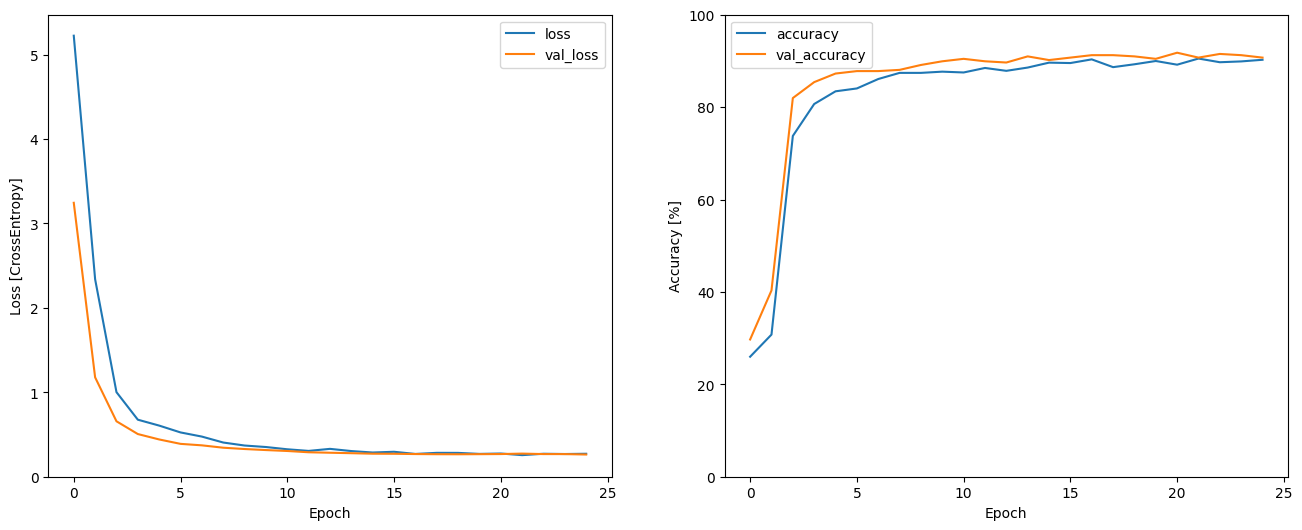

In [ ]:
metrics = history3.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history3.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history3.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')



In [ ]:
# Evaluieren des Modells auf dem Testdatenset
test_results = fine_tune_model.evaluate(test_ds)
print("Testergebnisse:", test_results)

376/376 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.9043
Testergebnisse: [0.24166527390480042, 0.9042553305625916]


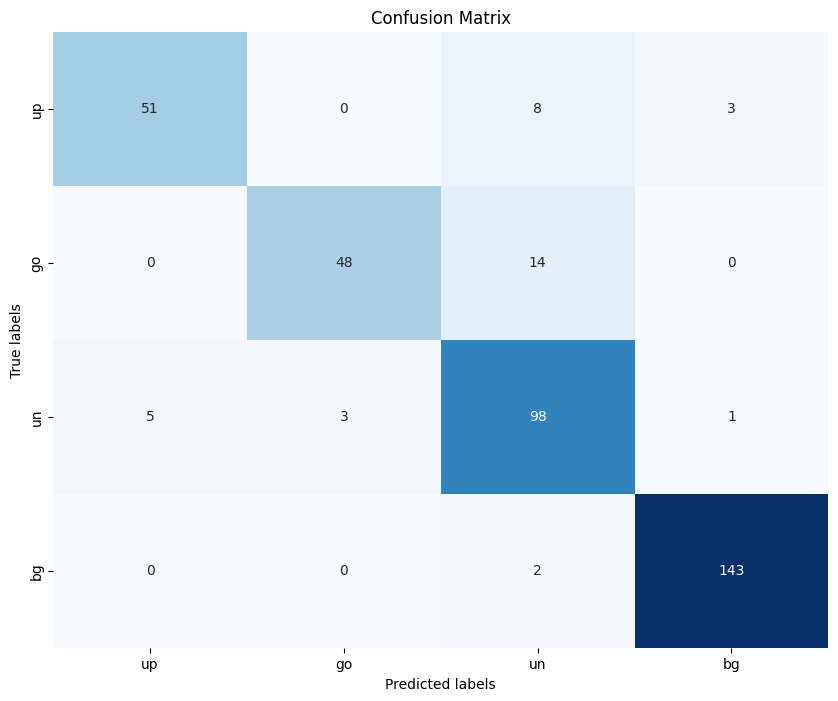

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Vorhersagen auf dem Testdatensatz
predictions = fine_tune_model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Wirkliche Labels extrahieren
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Konfusionsmatrix erstellen
cm = confusion_matrix(true_labels, predicted_classes)

# Kategorien für die Achsenbeschriftungen
labels = ["up", "go", "un", "bg"]

# Heatmap der Konfusionsmatrix zeichnen
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
fine_tune_model.save('fine_tuned_model')

## A.5. Model Optimization




### Quantization Aware Training

In [ ]:
final_model = tf.keras.models.load_model("fine_tuned_model")

In [ ]:
import tensorflow_model_optimization as tfmot

def apply_qat_to_dense_and_cnn(layer):
  if isinstance(layer, (tf.keras.layers.Dense, tf.keras.layers.Conv2D)):
    return tfmot.quantization.keras.quantize_annotate_layer(layer)
  return layer

annotated_model = tf.keras.models.clone_model(
    fine_tune_model,
    clone_function=apply_qat_to_dense_and_cnn,
)

quant_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)
quant_aware_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 129, 1)]     0         
                                                                 
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 13, 13, 8)        539       
 erV2)                                                           
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                           

In [ ]:
quant_aware_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
    metrics=['accuracy']
)

EPOCHS=1
quant_aware_history = quant_aware_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

1128/1128 [==============================] - 3s 2ms/step - loss: 0.4682 - accuracy: 0.8856 - val_loss: 0.3067 - val_accuracy: 0.9098


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = quant_aware_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


376/376 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.9149
Test Loss: 0.31769996881484985
Test Accuracy: 0.914893627166748


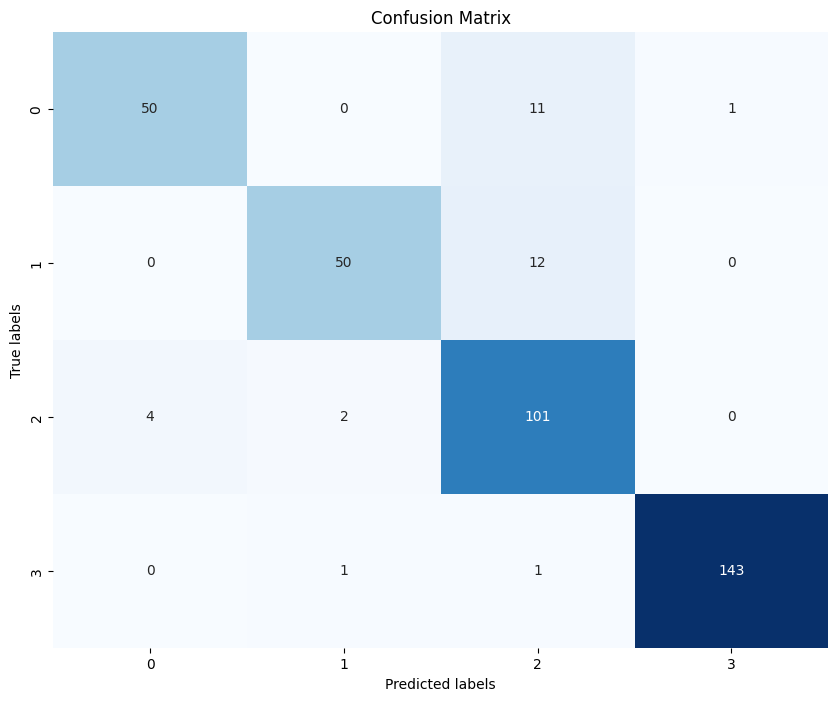

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Vorhersagen auf dem Testdatensatz
predictions = quant_aware_model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Wirkliche Labels extrahieren
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Konfusionsmatrix erstellen
cm = confusion_matrix(true_labels, predicted_classes)

# Heatmap der Konfusionsmatrix zeichnen
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Saving model in TFLite format


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)


converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_data_gen():
  for input_value, output_value in train_ds.unbatch().batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]

converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_model_quant = converter.convert()

with open("tflite_model.tflite", "wb") as f:
  f.write(tflite_model_quant)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


### Test TF Lite model


In [ ]:
import tensorflow.lite as tflite

# Load the interpreter and allocate tensors
interpreter = tflite.Interpreter("tflite_model.tflite")
interpreter.allocate_tensors()

# Load input and output details
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

# Set quantization values
input_scale, input_zero_point = input_details["quantization"]
output_scale, output_zero_point = output_details["quantization"]

In [ ]:
# Calculate the number of correct predictions
correct = 0
test_ds_len = 0

# Loop through entire test set
for x, y in test_ds.unbatch():
  # original shape is [124, 129, 1] expand to [1, 124, 129, 1]
  x = tf.expand_dims(x, 0).numpy()

  # quantize the input value
  if (input_scale, input_zero_point) != (0, 0):
    x = x / input_scale + input_zero_point
  x = x.astype(input_details['dtype'])

  # add the input tensor to interpreter
  interpreter.set_tensor(input_details["index"], x)

  #run the model
  interpreter.invoke()

  # Get output data from model and convert to fp32
  output_data = interpreter.get_tensor(output_details["index"])
  output_data = output_data.astype(np.float32)

  # Dequantize the output
  if (output_scale, output_zero_point) != (0.0, 0):
    output_data = (output_data - output_zero_point) * output_scale

 # Convert output to predicted class index
  predicted_class_index = np.argmax(output_data)

  # Add 1 if predicted category matches the label
  correct += 1 if predicted_class_index == y.numpy() else 0

  test_ds_len += 1


In [ ]:
accuracy = correct / test_ds_len
print(f"Accuracy for quantized model is {accuracy*100:.2f}% (to 2 D.P) on test set.")

Accuracy for quantized model is 90.96% (to 2 D.P) on test set.


## A.6. Deploy on Device

#### Convert `.tflite` to `.h` file


In [ ]:
%%shell
echo "alignas(8) const unsigned char tflite_model[] = {" > tflite_model.h
cat tflite_model.tflite | xxd -i                        >> tflite_model.h
echo "};"                                               >> tflite_model.h

In [ ]:
def count_model_size(file_path):
    with open(file_path, 'r') as file:
        data = file.read()

    # Angenommen, die Hexadezimalwerte sind durch Kommas getrennt
    model_data = data[data.find('{')+1:data.find('}')].strip()
    hex_values = model_data.split(',')

    # Entferne leere Strings, die nach der Aufteilung auftreten könnten
    hex_values = [value for value in hex_values if value.strip()]

    return len(hex_values)

# Pfad zur Header-Datei
file_path = '/content/tflite_model.h'
model_size = count_model_size(file_path)
print(f"Die Größe des Modells im Speicher beträgt: {model_size} Bytes")


Die Größe des Modells im Speicher beträgt: 4848 Bytes


#### Inference Application




In [ ]:
!cp tflite_model.h inference-app/src/tflite_model.h

#### Compile Inference Application


In [ ]:
%%shell
cd inference-app
mkdir -p build
cd build
cmake .. -DPICO_BOARD=${PICO_BOARD}

Using PICO_SDK_PATH from environment ('/content/pico-sdk')
PICO_SDK_PATH is /content/pico-sdk
Defaulting PICO_PLATFORM to rp2040 since not specified.
Defaulting PICO platform compiler to pico_arm_gcc since not specified.
-- Defaulting build type to 'Release' since not specified.
PICO compiler is pico_arm_gcc
-- The C compiler identification is GNU 10.2.1
-- The CXX compiler identification is GNU 10.2.1
-- The ASM compiler identification is GNU
-- Found assembler: /content/tools/gcc-arm-none-eabi-10-2020-q4-major/bin/arm-none-eabi-gcc
Using PICO_BOARD from environment ('pico')
Using board configuration from /content/pico-sdk/src/boards/include/boards/pico.h
-- Found Python3: /usr/bin/python3.10 (found version "3.10.12") found components: Interpreter 
TinyUSB available at /content/pico-sdk/lib/tinyusb/src/portable/raspberrypi/rp2040; adding USB support.
-- Configuring done
-- Generating done
-- Build files have been written to: /content/inference-app/build


In [111]:
%%shell
cd inference-app/build

make -j

[  0%] Built target bs2_default
[  0%] Performing build step for 'ELF2UF2Build'
[  0%] Built target CMSISDSPTransform
[  0%] Performing build step for 'PioasmBuild'
[  0%] Built target CMSISDSPFastMath
[  0%] Built target CMSISDSPCommon
[  0%] Built target CMSISDSPComplexMath
[  0%] Built target bs2_default_padded_checksummed_asm
[  0%] Built target CMSISDSPSupport
[  0%] Built target CMSISDSPBasicMath
[100%] Built target elf2uf2
[  0%] No install step for 'ELF2UF2Build'
[100%] Built target pioasm
[  0%] No install step for 'PioasmBuild'
[  0%] Completed 'ELF2UF2Build'
[  0%] Completed 'PioasmBuild'
[  0%] Built target ELF2UF2Build
[  0%] Built target PioasmBuild
[  0%] Built target pico_pdm_microphone_pdm_microphone_pio_h
[ 66%] Built target pico-tflmicro
Consolidate compiler generated dependencies of target pico_inference_app
[ 66%] Building CXX object CMakeFiles/pico_inference_app.dir/src/main.cpp.obj
[ 66%] Linking CXX executable pico_inference_app.elf
[100%] Built target pico_infe

#### Flash inferencing application to board



In [110]:
from colab_utils.pico import flash_pico

flash_pico('inference-app/build/pico_inference_app.bin')

<IPython.core.display.Javascript object>

#### Serial Monitor



In [ ]:
from colab_utils.serial_monitor import run_serial_monitor

run_serial_monitor()

<IPython.core.display.Javascript object>